In [ ]:
# Largest Rectangle(working), perspective transform(broken)

# DO NOT MESS WITH THIS CODE, CREATE COPY AND EDIT

import cv2
import numpy as np
cap = cv2.VideoCapture(0)
i = 1
while(1):
    _, frame = cap.read()
    grayFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gaussian = cv2.GaussianBlur(grayFrame, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(gaussian, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 9, 12)
    contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    largest_item_cnt = []
    
    def get_contour_areas(contours):
        largest_item_loc = 0
        
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > largest_item_loc:
                largest_item_cnt = np.copy(cnt)
                largest_item_loc = area
            
        return largest_item_cnt
    
    largest_item = get_contour_areas(contours)
    
    ext_left_2d = np.array([largest_item[largest_item[:, :, 0].argmin()][0]]) #bottom-left = [0, 0], dim = 2
    ext_right_2d = np.array([largest_item[largest_item[:, :, 0].argmax()][0]]) #top-right = [100, 100], dim = 2
    ext_top_2d = np.array([largest_item[largest_item[:, :, 1].argmin()][0]]) #bottom-right = [100, 0], dim = 2
    ext_bot_2d = np.array([largest_item[largest_item[:, :, 1].argmax()][0]]) #top-left = [0, 100], dim = 2

#     Rectangle ABCD
#     A = Top Left
#     B = Bottom Left
#     C = Bottom Right
#     D = Top Right
    
    pt_B = ext_left_2d.flatten() #bottom-left
    pt_D = ext_right_2d.flatten() #top-right 
    pt_C = ext_top_2d.flatten() #bottom-right
    pt_A = ext_bot_2d.flatten() #top-left
    
#     Here, I have used L2 norm. You can use L1 also.
    width_AD = np.sqrt(((pt_A[0] - pt_D[0]) ** 2) + ((pt_A[1] - pt_D[1]) ** 2))
    width_BC = np.sqrt(((pt_B[0] - pt_C[0]) ** 2) + ((pt_B[1] - pt_C[1]) ** 2))
    maxWidth = max(int(width_AD), int(width_BC))

    height_AB = np.sqrt(((pt_A[0] - pt_B[0]) ** 2) + ((pt_A[1] - pt_B[1]) ** 2))
    height_CD = np.sqrt(((pt_C[0] - pt_D[0]) ** 2) + ((pt_C[1] - pt_D[1]) ** 2))
    maxHeight = max(int(height_AB), int(height_CD))
    
    input_pts = np.float32([pt_A, pt_B, pt_C, pt_D])
    output_pts = np.float32([[0, 0], [0, maxHeight - 1], [maxWidth - 1, maxHeight - 1], [maxWidth - 1, 0]])
#     output_pts = np.float32([[0, 0], [0, 100], [100, 100], [100, 0]])
    
    

        
#     if i%30 == 0:
#         print(i/30)
#         print(ext_left.ndim)
#         print(ext_left)
#         print(ext_right)
#         print(ext_top)
#         print(ext_bot)
#         print(src_coord)
#         print(dst_coord)
#         i+=1
#     else:
#         i+=1
        
    cv2.drawContours(frame, largest_item, -1, (0, 255, 0), 2)
#     matrix = cv2.getPerspectiveTransform(src_coord, dst_coord)
#     result = cv2.warpPerspective(frame, matrix, (100, 100))
    
    cv2.imshow('Adaptive Threshold', thresh)
    cv2.imshow('Largest Rectangle', frame)
    matrix = cv2.getPerspectiveTransform(input_pts,output_pts)
    result = cv2.warpPerspective(thresh, matrix, (maxWidth, maxHeight), flags=cv2.INTER_LINEAR)
    cv2.imshow('Perspective Transformed', result)        
    
    if cv2.waitKey(1) == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
# Code-copy-LargestRectangle, perspective transform removed
# Applied Erosion to get Region of Interest

import cv2
import numpy as np
cap = cv2.VideoCapture(0)
i = 1
while(1):
    _, frame = cap.read()
    grayFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gaussian = cv2.GaussianBlur(grayFrame, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(gaussian, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 5, 7)
    contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    largest_item_cnt = []
    
    def get_contour_areas(contours):
        largest_item_loc = 0
        
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > largest_item_loc:
                largest_item_cnt = np.copy(cnt)
                largest_item_loc = area
            
        return largest_item_cnt
    
    largest_item = get_contour_areas(contours)
    
    kernel = np.ones((3,3), np.uint8)
    erosion = cv2.erode(thresh, kernel, cv2.BORDER_REFLECT)
  
    cv2.drawContours(frame, largest_item, -1, (0, 255, 0), 2)
    
    cv2.imshow('Adaptive Threshold', thresh)
    cv2.imshow('Largest Rectangle', frame)
    cv2.imshow('Eroded Threshold', erosion)
    
    if cv2.waitKey(1) == 27:
        break

cap.release()
cv2.destroyAllWindows()

Second:  31
(288, 298)
Second:  61
(389, 295)
Second:  91
(149, 288)
Second:  121
(265, 290)
Second:  151
(262, 286)
Second:  181
(265, 287)
Second:  211
(268, 287)
Second:  241
(269, 289)
Second:  271
(271, 286)
Second:  301
(277, 290)
Second:  331
(279, 292)
Second:  361
(280, 292)
Second:  391
(283, 293)
Second:  421
(284, 296)
Second:  451
(283, 295)
Second:  481
(284, 295)
Second:  511
(284, 296)
Second:  541
(285, 296)
Second:  571
(283, 294)
Second:  601
(285, 294)
Second:  631
(287, 297)
Second:  661
(27, 1)
Second:  691
(5, 70)


No handles with labels found to put in legend.


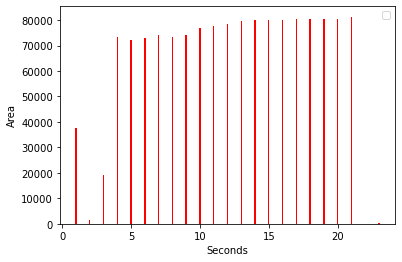

In [1]:
# Largest Rectangle(working), perspective transform(almost working*)

# Edit - 1: Rectified Perspective Transform
# !pip install opencv-python

import cv2
import numpy as np
import matplotlib.pyplot as plt
cap = cv2.VideoCapture(0)
i = 1
seconds = []
# shape_list = []
area_list = []
while(1):
    _, frame = cap.read()
    grayFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gaussian = cv2.GaussianBlur(grayFrame, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(gaussian, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 9, 12)
    contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    largest_item_cnt = []
    
    def get_contour_areas(contours):
        largest_item_loc = 0
        
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > largest_item_loc:
                largest_item_cnt = np.copy(cnt)
                largest_item_loc = area
            
        return largest_item_cnt
    
    largest_item = get_contour_areas(contours)
    
    
    ext_left_2d = np.array([largest_item[largest_item[:, :, 0].argmin()][0]]) #bottom-left = [0, 0], dim = 2
    ext_right_2d = np.array([largest_item[largest_item[:, :, 0].argmax()][0]]) #top-right = [100, 100], dim = 2
    ext_top_2d = np.array([largest_item[largest_item[:, :, 1].argmin()][0]]) #bottom-right = [100, 0], dim = 2
    ext_bot_2d = np.array([largest_item[largest_item[:, :, 1].argmax()][0]]) #top-left = [0, 100], dim = 2

#     Rectangle ABCD
#     A = Top Left
#     B = Bottom Left
#     C = Bottom Right
#     D = Top Right
    
    pt_A = ext_left_2d.flatten() #bottom-left
    pt_C = ext_right_2d.flatten() #top-right 
    pt_D = ext_top_2d.flatten() #bottom-right
    pt_B = ext_bot_2d.flatten() #top-left
    
#     Here, I have used L2 norm. You can use L1 also.
    width_AD = np.sqrt(((pt_A[0] - pt_D[0]) ** 2) + ((pt_A[1] - pt_D[1]) ** 2))
    width_BC = np.sqrt(((pt_B[0] - pt_C[0]) ** 2) + ((pt_B[1] - pt_C[1]) ** 2))
    maxWidth = max(int(width_AD), int(width_BC))

    height_AB = np.sqrt(((pt_A[0] - pt_B[0]) ** 2) + ((pt_A[1] - pt_B[1]) ** 2))
    height_CD = np.sqrt(((pt_C[0] - pt_D[0]) ** 2) + ((pt_C[1] - pt_D[1]) ** 2))
    maxHeight = max(int(height_AB), int(height_CD))
    
    input_pts = np.float32([pt_A, pt_B, pt_C, pt_D])
    output_pts = np.float32([[0, 0], [0, maxHeight - 1], [maxWidth - 1, maxHeight - 1], [maxWidth - 1, 0]])
#     output_pts = np.float32([[0, 0], [0, 100], [100, 100], [100, 0]])
    
#     gradient = cv2.morphologyEx(result, cv2.MORPH_GRADIENT, (5, 5))    

        

        
    cv2.drawContours(frame, largest_item, -1, (0, 255, 0), 2)
#     matrix = cv2.getPerspectiveTransform(src_coord, dst_coord)
#     result = cv2.warpPerspective(frame, matrix, (100, 100))
    
    cv2.imshow('Adaptive Threshold', thresh)
    cv2.imshow('Largest Rectangle', frame)
    matrix = cv2.getPerspectiveTransform(input_pts,output_pts)
    result = cv2.warpPerspective(thresh, matrix, (maxWidth, maxHeight), flags=cv2.INTER_LINEAR)
    cv2.imshow('Perspective Transformed', result)   
#     cv2.imshow('Morph Gradient', gradient)
    
    
    if i%30 == 0:
#         print(i/30)
#         print(ext_left.ndim)
#         print(ext_left)
#         print(ext_right)
#         print(ext_top)
#         print(ext_bot)
#         print(src_coord)
#         print(dst_coord)
#         shape_list.append(result.shape)
        
        area = cv2.contourArea(largest_item)
        area_list.append(area)
        seconds.append(i/30)
        i+=1
        print("Second: ", i)
        print(result.shape)
    else:
        i+=1    
    
    if cv2.waitKey(1) == 27:
        break


plt.bar(seconds, area_list, color ='red', width = 0.1)
plt.ylabel('Area')
plt.xlabel('Seconds')
plt.legend()
plt.show()
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(len(seconds))

In [ ]:
print(area_list[0])
print(type(area_list[0]))

In [ ]:
# Largest Rectangle(working), perspective transform(almost working*)

# Edit - 1: Rectified Perspective Transform
# !pip install opencv-python

# Edit - 2: Trying to find rectangles with largest rectangle

import cv2
import numpy as np
cap = cv2.VideoCapture(0)
i = 1
while(1):
    _, frame = cap.read()
    grayFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gaussian = cv2.GaussianBlur(grayFrame, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(gaussian, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 9, 12)
    contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    largest_item_cnt = []
    
    def get_contour_areas(contours):
        largest_item_loc = 0
        
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > largest_item_loc:
                largest_item_cnt = np.copy(cnt)
                largest_item_loc = area
            
        return largest_item_cnt
    
    largest_item = get_contour_areas(contours)
    
    ext_left_2d = np.array([largest_item[largest_item[:, :, 0].argmin()][0]]) #bottom-left = [0, 0], dim = 2
    ext_right_2d = np.array([largest_item[largest_item[:, :, 0].argmax()][0]]) #top-right = [100, 100], dim = 2
    ext_top_2d = np.array([largest_item[largest_item[:, :, 1].argmin()][0]]) #bottom-right = [100, 0], dim = 2
    ext_bot_2d = np.array([largest_item[largest_item[:, :, 1].argmax()][0]]) #top-left = [0, 100], dim = 2

#     Rectangle ABCD
#     A = Top Left
#     B = Bottom Left
#     C = Bottom Right
#     D = Top Right
    
    pt_A = ext_left_2d.flatten() #bottom-left
    pt_C = ext_right_2d.flatten() #top-right 
    pt_D = ext_top_2d.flatten() #bottom-right
    pt_B = ext_bot_2d.flatten() #top-left
    
#     Here, I have used L2 norm. You can use L1 also.
    width_AD = np.sqrt(((pt_A[0] - pt_D[0]) ** 2) + ((pt_A[1] - pt_D[1]) ** 2))
    width_BC = np.sqrt(((pt_B[0] - pt_C[0]) ** 2) + ((pt_B[1] - pt_C[1]) ** 2))
    maxWidth = max(int(width_AD), int(width_BC))

    height_AB = np.sqrt(((pt_A[0] - pt_B[0]) ** 2) + ((pt_A[1] - pt_B[1]) ** 2))
    height_CD = np.sqrt(((pt_C[0] - pt_D[0]) ** 2) + ((pt_C[1] - pt_D[1]) ** 2))
    maxHeight = max(int(height_AB), int(height_CD))
    
    input_pts = np.float32([pt_A, pt_B, pt_C, pt_D])
    output_pts = np.float32([[0, 0], [0, maxHeight - 1], [maxWidth - 1, maxHeight - 1], [maxWidth - 1, 0]])
#     output_pts = np.float32([[0, 0], [0, 100], [100, 100], [100, 0]])
    
#     gradient = cv2.morphologyEx(result, cv2.MORPH_GRADIENT, (5, 5))    

    matrix = cv2.getPerspectiveTransform(input_pts,output_pts)
    result = cv2.warpPerspective(thresh, matrix, (maxWidth, maxHeight), flags=cv2.INTER_LINEAR)
    contours_result, hierarchy_result = cv2.findContours(result.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(result, contours_result, -1, (0, 0, 0), 2)

        
    cv2.drawContours(frame, largest_item, -1, (0, 255, 0), 2)
#     matrix = cv2.getPerspectiveTransform(src_coord, dst_coord)
#     result = cv2.warpPerspective(frame, matrix, (100, 100))
    
    cv2.imshow('Adaptive Threshold', thresh)
    cv2.imshow('Largest Rectangle', frame)

    cv2.imshow('Perspective Transformed', result)   
    
#     cv2.imshow('Morph Gradient', gradient)
    
    
    if i%30 == 0:
#         print(i/30)
#         print(ext_left.ndim)
#         print(ext_left)
#         print(ext_right)
#         print(ext_top)
#         print(ext_bot)
#         print(src_coord)
#         print(dst_coord)
        i+=1
        print(result.shape)
    else:
        i+=1    
    
    if cv2.waitKey(1) == 27:
        break

cap.release()
cv2.destroyAllWindows()